# COMPUTER VISION USING PYTHON 3


## Dependencies

In [124]:
import numpy as np
import PIL
import skimage
from PIL import Image
from PIL import ImageEnhance, ImageFilter
from skimage import data, io, color, draw
from skimage import morphology
from skimage import filters
from skimage.draw import circle_perimeter
from skimage.morphology import disk
from skimage.filters import median
from skimage.io import imread

## Pillow

#### Reading an image

In [40]:
img = Image.open("astro.jpg")
img.show()

#### Writing/saving an image

In [41]:
img.save("C:/Users/hp/Documents/Application CompV/cosmo.png")

#### Cropping an image

In [42]:
dim = (100,100,400,400) #Dimensions of the ROI  (top, left, bottom, right)
crop_img = img.crop(dim)
crop_img.show()

#### COLOR CONVERSION
- Images can be converted from one color space to another using the convert function.
- To convert an image from RGB color space to grayscale color space, use the "L" mode.
- There are various other modes available such as:
  * 1 = 1 bit pixel mode 
  * P = 8 bit pixel mode
  * RGB = 3x8 bit pixel mode
  * RGBA = 4x8 bit pixel mode

In [43]:
grayscale = img.convert("L")  # Converts image  to Grayscale
grayscale.show()

#### Changing between color spaces

In [44]:
img = Image.open("cosmo.png")
img.getpixel((100,100)) # displays image's RGB value in X-Y coordinates

(187, 178, 173)

In [45]:
img.convert("L").getpixel((100,100)) # displays image's Grayscale value in X-Y coordinates
 # or
grayscale.getpixel((100,100)) # displays image's Grayscale value in X-Y coordinates

180

#### Geometrical transformation
Types of transformations :
   * resize, rotate, and flip

In [46]:
# Resize
resize_img = img.resize((200,200)) # resize image on X-Y  axis
resize_img.show()

In [47]:
# Rotate
rotate_img = img.rotate(90) # rotate the image by a "n"degrees
rotate_img.show()

Flip: 
Image.transpose(method)
*  method – Possible values of method are
   * PIL.Image.FLIP_LEFT_RIGHT
   * PIL.Image.FLIP_TOP_BOTTOM

In [48]:
# Flip L-R
flip_img_lr = img.transpose(PIL.Image.FLIP_LEFT_RIGHT)
flip_img_lr.show()

In [49]:
# Flip T-B
flip_img_lr = img.transpose(PIL.Image.FLIP_TOP_BOTTOM)
flip_img_lr.show()

#### Image enhancement
Image enhancement involves operations such as changing the contrast, brightness, color balance, or sharpness of an image.

The enhance(n) function takes a float as an argument, which describes the factor which we want to change the contrast, brightness, color balance, or sharpness of an image of the image.
* n < 1 will decrease the contrast, brightness, color balance, or sharpness of an image. 
* n > 1 will increase the contrast, brightness, color balance, or sharpness of an image. 
* n = 1 will give the original image as output.

In [50]:
# Change brightness of an image
brite = ImageEnhance.Brightness(img)
brite.enhance(2).show()  # enhance(n)  n = times of brightness 

In [51]:
# Change the contrast of the image
contra = ImageEnhance.Contrast(img)
contra.enhance(3).show()  # enhance(n)  n = times of contrast

In [52]:
# Change the sharpness of the image
sharp= ImageEnhance.Sharpness(img)
sharp.enhance(0.5).show()  # enhance(n)  n = times of contrast

In [53]:
# Change the color balance of the image
col_bal= ImageEnhance.Color(img)
col_bal.enhance(10).show()  # enhance(n)  n = times of contrast

#### Accessing pixels of an image
Access the individual pixels in an image
- getpixel(): 
  * This function returns the color value of the pixel at the (x, y) coordinate. 
  * It takes a tuple as an argument and returns a tuple of color values
 
- putpixel(): 
  * This function changes the color value of the pixel at the (x, y) coordinate to a new color value. 
  * Both the coordinates and the new color value are passed as an argument to the function.
  * If the image has more than one band of colors, then a tuple is passed as an argument to the function

In [54]:
# getpixel()
img.getpixel((100,100)) # display colour value in X-Y axis

(187, 178, 173)

In [55]:
# putpixel()
img.putpixel((100,100),(20,230,145)) # change colour value
img.getpixel((100,100))

(20, 230, 145)

## scikit-image
Python library for image processing, scikit-image, also represented as Skimage.
* scikit-image provides more advanced operations as compared to Pillow and is suitable for building enterprise-scale applications.


#### Reading an image:

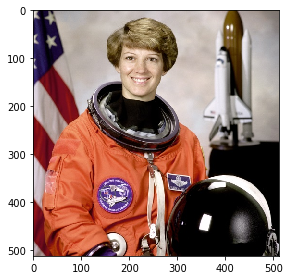

In [56]:
img = io.imread("astro.jpg")
io.imshow(img)
io.show()

#### Writing/saving an image:

In [57]:
img = io.imread("astro.jpg")
io.imsave("image.png", img)

#### Data module:
Provides some standard test images which one can work on like:
 * grayscale camera image
 * grayscale text image 
 * coffee cup
 

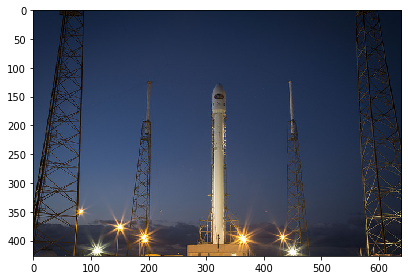

In [58]:
rocket = data.rocket() 
io.imshow(rocket)
io.show()

#### Color module
Conversion from one color sapce to another 

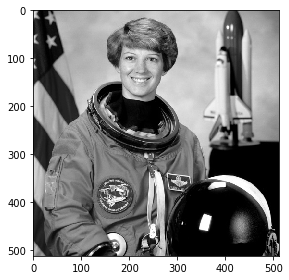

In [59]:
img = io.imread("image.png")
gray = color.rgb2gray(img)
io.imshow(gray)
io.show()

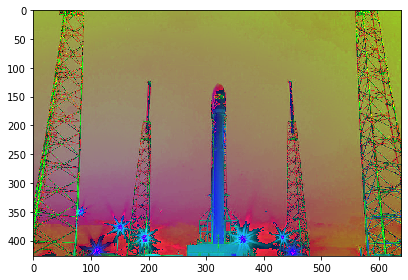

In [60]:
img = data.rocket()
img_hsv = color.rgb2hsv(img)
io.imshow(img_hsv)
io.show()

#### Draw module:
It has various functions to draw different shapes such as circles, ellipses, and polygons.

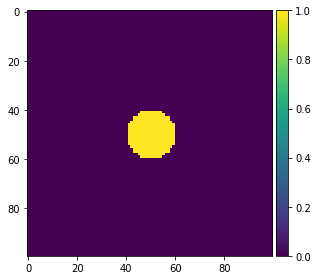

In [61]:
# Circle
img = np.zeros((100, 100), dtype=np.uint8)  # Scale on X-Y axis {100-100}
x , y = draw.circle(50, 50, 10) #  Circle of radius 10 and Centre (50, 50)
img[x, y] = 1
io.imshow(img)
io.show()

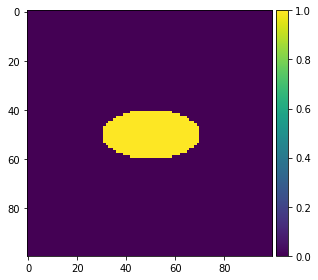

In [62]:
# Ellipse
img = np.zeros((100, 100), dtype=np.uint8)  # Scale on X-Y axis {100-100}
x , y = draw.ellipse(50, 50, 10, 20) # Ellipse of  hieght 10, width 20 and Centre (50, 50)
img[x, y] = 1
io.imshow(img)
io.show()

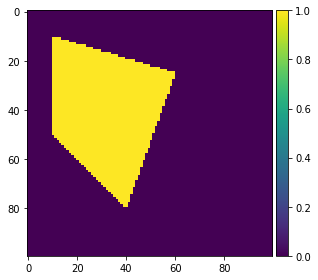

In [63]:
# Polygon
img = np.zeros((100, 100), dtype=np.uint8)  # Scale on X-Y axis {100-100}
r = np.array([10, 25, 80, 50]) # top-left & top-right X-Y coordinate
c = np.array([10, 60, 40, 10]) # bottom-left & bottom-right X-Y coordinate
x, y = draw.polygon(r, c)
img[x, y] = 1
io.imshow(img)
io.show()

## Image Filtering
Enhancing an image by applying some function on the pixel values. \
Types of filtering are as follows:
 * Gaussian blur
 * Median filter
 * Dilation and erosion
 * Customs filters
 * Image thresholding

#### Gaussian blur
It uses the Gaussian distribution bell curve.\
When we create a kernel that follows a Gaussian distribution, the center pixel gets the most
weight and its neighboring pixels get lesser weight when performing convolution.



C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  


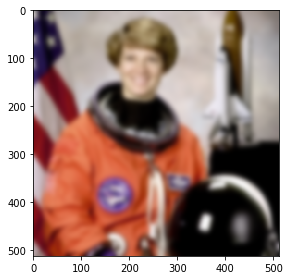

In [72]:
blr = io.imread("image.png")
blur = filters.gaussian(blr, sigma=5) # sigma = standard deviation/ blur intensity
io.imshow(blur)
io.show()

#### Median filter
This is a very simple filter that returns the median value from the pixel and its
neighbors

In [87]:
img = Image.open("image.png")
blur_img = img.filter(ImageFilter.MedianFilter(7))
blur_img.show()

In [112]:
# img = io.imread("image.png")
# med = median(img, disk(5))
# io.imshow(out)
# io.show()

#### Dilation and erosion

In [129]:
img = io.imread('image.png')
eroded_img = morphology.binary_erosion(img)
io.imshow(eroded_img)
io.show()

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

In [132]:
# img = Image.open("image.png")
# img = img.convert("L")
# new_img = img.filter(ImageFilter.Kernel((3,3),[1,0,-1,5,0,-5,1,0,1]))
# new_img.show()